In [7]:
pip install networkx


  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

  Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp312-cp312-manylinux_2_5_x86_64

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('city_distances.csv')
print("Number of unreachable paths:", np.sum(df.values == 100000))
print(df.head())  # Display first few rows


Number of unreachable paths: 192
      0         1         2         3         4         5         6         7  \
0   0.0      32.0       9.0      94.0      38.0  100000.0      58.0  100000.0   
1  32.0       0.0  100000.0  100000.0  100000.0      90.0      60.0      29.0   
2   9.0  100000.0       0.0      61.0  100000.0  100000.0      61.0      77.0   
3  94.0  100000.0      61.0       0.0      91.0      64.0      36.0      30.0   
4  38.0  100000.0  100000.0      91.0       0.0       3.0  100000.0      57.0   

          8         9  ...    22    23    24        25        26        27  \
0      27.0  100000.0  ...  98.0  37.0  42.0      16.0  100000.0      95.0   
1      55.0      75.0  ...  71.0  27.0  95.0      66.0      32.0      87.0   
2       7.0      80.0  ...  24.0  33.0  64.0      56.0      48.0  100000.0   
3  100000.0  100000.0  ...  14.0  68.0  97.0      26.0      61.0      21.0   
4  100000.0      75.0  ...  27.0  34.0  86.0  100000.0      63.0      69.0   

     28    

Total possible connections (excluding self-loops): 992
Actual valid connections: 832


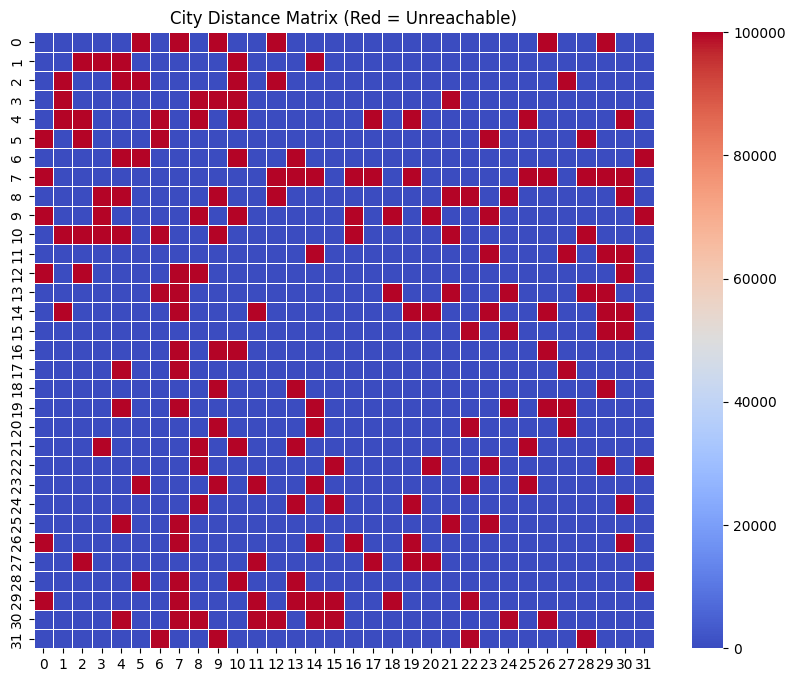

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the distance matrix
distance_matrix = pd.read_csv("city_distances.csv").to_numpy()

# Count how many valid connections exist (values < 100000)
valid_connections = np.sum(distance_matrix < 100000)

print("Total possible connections (excluding self-loops):", distance_matrix.shape[0] * (distance_matrix.shape[1] - 1))
print("Actual valid connections:", valid_connections)

# Heatmap to visualize the connections
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("City Distance Matrix (Red = Unreachable)")
plt.show()


In [1]:
import networkx as nx
import numpy as np
import pandas as pd

# Load the distance matrix
distance_matrix = pd.read_csv("city_distances.csv").to_numpy()

# Create a graph using NetworkX
G = nx.Graph()

num_nodes = distance_matrix.shape[0]

# Add edges only where distances are valid (< 100000)
for i in range(num_nodes):
    for j in range(num_nodes):
        if distance_matrix[i, j] < 100000 and i != j:
            G.add_edge(i, j, weight=distance_matrix[i, j])

# Check connectivity
is_connected = nx.is_connected(G)
print("Graph is fully connected:", is_connected)

# If the graph is disconnected, find the isolated nodes
if not is_connected:
    components = list(nx.connected_components(G))
    print(f"Graph has {len(components)} disconnected components.")
    for idx, component in enumerate(components):
        print(f"Component {idx + 1}: {sorted(component)}")


Graph is fully connected: True


In [2]:
def is_route_valid(route, distance_matrix):
    """Check if a given route is valid (i.e., all connections exist)."""
    for i in range(len(route) - 1):
        if distance_matrix[route[i], route[i + 1]] >= 100000:  # 100000 marks unreachable paths
            return False
    return True

# Example usage (after generating a route)
route = [0, 5, 12, 3, 8, 25, 30]  # Replace with an actual generated route
if not is_route_valid(route, distance_matrix):
    print("❌ Invalid route detected!")
else:
    print("✅ Route is valid.")


❌ Invalid route detected!


In [1]:
import numpy as np
from genetic_algorithms_functions import calculate_fitness

# Example distance matrix (5 nodes)
distance_matrix = np.array([
    [0, 10, 20, 30, 40],
    [10, 0, 25, 35, 45],
    [20, 25, 0, 15, 50],
    [30, 35, 15, 0, 55],
    [40, 45, 50, 55, 0]
])

# Example valid route
route = [0, 1, 2, 3, 4, 0]
fitness = calculate_fitness(route, distance_matrix)
print("Fitness:", fitness)  # Should be a negative number, NOT -1000000.0

# Example invalid route (node 1 → 3 is disconnected)
distance_matrix[1, 3] = 100000
route = [0, 1, 3, 4, 2, 0]
fitness = calculate_fitness(route, distance_matrix)
print("Fitness (should be -1000000):", fitness)


Fitness: -145
Fitness (should be -1000000): -1000000.0
